<a href="https://colab.research.google.com/github/harika-mini/Fake-News-Detection/blob/main/fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Conv1D,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [3]:
fake=pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv")

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

<Axes: xlabel='subject', ylabel='count'>

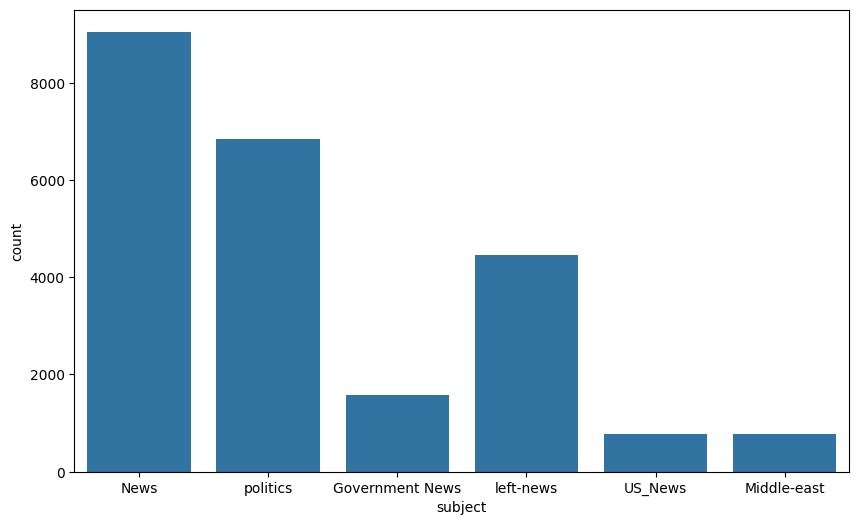

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(x="subject",data=fake)

In [7]:
text=" ".join(fake['text'].tolist())


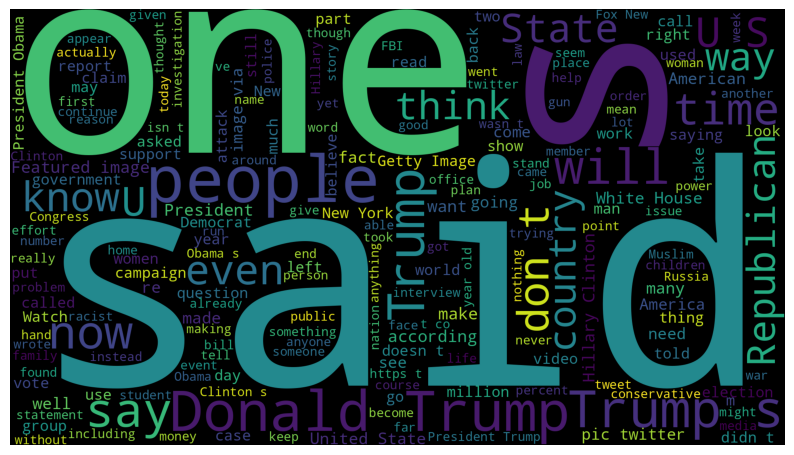

In [8]:
wordcloud=WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [9]:
real=pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv")
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
text=" ".join(real['text'].tolist())


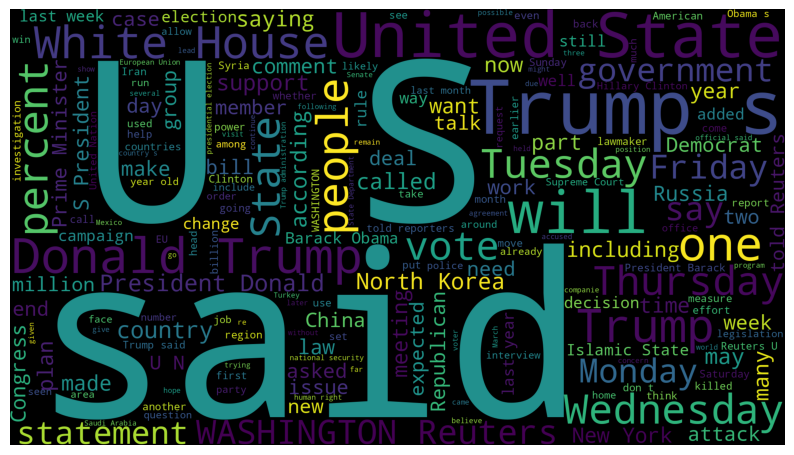

In [11]:
wordcloud=WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [12]:
real.sample(5)

,title,text,subject,date
8830,Obama says more must be done to address U.S. p...,"WARSAW, Poland (Reuters) - President Barack Ob...",politicsNews,"July 8, 2016"
7794,Lockheed Martin wins $743 million U.S. defense...,WASHINGTON (Reuters) - Lockheed Martin Corp un...,politicsNews,"October 17, 2016"
5926,Qatar Airways issues advisory for U.S.-bound t...,DUBAI (Reuters) - Qatar Airways advised passen...,politicsNews,"January 28, 2017"
9526,Betting on a Trump win or a North Korea H-bomb...,NEW YORK/WELLINGTON (Reuters) - Erik Duhaime i...,politicsNews,"May 16, 2016"
17022,"Criticized for Egypt ties, France to raise hum...","PARIS (Reuters) - President Emmanuel Macron, c...",worldnews,"October 19, 2017"


In [13]:
unknown_publishers=[]
for index,row in enumerate(real.text.values):
  try:
    record=row.split("-",maxsplit=1)
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [14]:
len(unknown_publishers)

221

In [15]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 221, dtype: object

In [16]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [17]:
real = real.drop(8970,axis=0)

In [18]:
publisher=[]
tmp_text=[]
for index,row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('unknown')
  else:
    record=row.split("-",maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())





In [19]:
real['publisher']=publisher
real['text']=tmp_text

In [20]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [21]:
real.shape

(21416, 5)

In [22]:
empty_fake_index=[index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [23]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [24]:
real['text']=real['title']+" "+real['text']
fake['text']=fake['title']+" "+fake['text']


In [25]:
real['text']=real['text'].apply(lambda x:str(x).lower())
fake['test']=fake['text'].apply(lambda x:str(x).lower())


In [26]:
real['class']=1
fake['class']=0

In [27]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [28]:
real=real[['text','class']]
fake=fake[['text','class']]


In [29]:
data = pd.concat([real, fake], ignore_index=True)


In [30]:
data

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1
...,...,...
44892,McPain: John McCain Furious That Iran Treated ...,0
44893,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
44894,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
44895,How to Blow $700 Million: Al Jazeera America F...,0


In [31]:
data = pd.concat([real, fake], ignore_index=True)


In [32]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 87.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-uwsh8d_j
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-uwsh8d_j
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=83b931aeb854866e9db11d0df53808250917c77403f93253b3fb46410c13146f
  Stored in di

In [33]:
import preprocess_kgptalkie as ps

In [34]:
data['text']=data['text'].apply(lambda x:ps.remove_special_chars(x))

In [35]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


In [36]:
import gensim

In [37]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


In [38]:
y=data['class'].values

In [39]:
x=[d.split() for d in data['text'].tolist()]

In [40]:
print(x[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [41]:
DIM=100
w2v_model=gensim.models.Word2Vec(sentences=x,vector_size=DIM,window=10,min_count=1)

In [42]:
len(w2v_model.wv.key_to_index)

272510

In [43]:
w2v_model.wv['India']

array([ 0.20378856,  0.90596586, -0.5948334 ,  0.70205057,  0.4674233 ,
       -0.8798226 ,  0.1029567 ,  1.033513  , -0.28831273, -0.68982583,
       -0.09012424,  0.30416796, -2.0840201 ,  0.18799232,  0.68086934,
       -0.63437593,  0.29757944,  0.94063765,  1.4061136 , -0.19228207,
        0.71735966,  1.158863  , -0.34668684,  0.41392013,  0.34704018,
       -0.8126169 ,  0.74579453, -0.64667726, -1.3072153 , -0.43050882,
        0.9355915 ,  0.74763817, -0.53779185, -0.84954125, -0.2308166 ,
        1.4378506 ,  0.54083806, -0.1562268 ,  0.6814562 ,  0.07741735,
        0.35984948,  0.0489133 , -0.09176932, -0.485018  ,  0.10025334,
       -0.9639856 ,  0.32785624,  0.37032697,  1.0801231 , -0.15351562,
       -0.26647967,  0.31155142, -0.61147887,  0.33630466,  1.1654105 ,
       -0.03014889, -0.8916089 , -0.4590167 , -0.26969457, -0.20415227,
       -0.5481406 ,  0.3736067 ,  0.6994212 , -0.6963882 , -0.22127597,
       -0.46541336,  0.9107288 , -0.65866125, -1.0541823 , -0.00

In [44]:
w2v_model.wv.most_similar('trump')

[('trumps', 0.8224735260009766),
 ('TrumpTrump', 0.6018806099891663),
 ('rumsfeld', 0.5851501822471619),
 ('obama', 0.5743064880371094),
 ('0823', 0.5553133487701416),
 ('Trump', 0.5526025891304016),
 ('gips', 0.5306669473648071),
 ('manoamano', 0.5300350785255432),
 ('washington', 0.5292186141014099),
 ('critchlow', 0.5282999873161316)]

In [45]:
 tokenizer=Tokenizer()
 tokenizer.fit_on_texts(x)


In [46]:
x=tokenizer.texts_to_sequences(x)

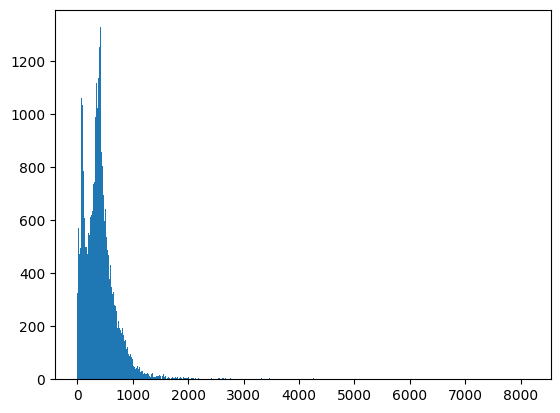

In [47]:
plt.hist([len(i) for i in x],bins=700 )
plt.show()


In [48]:
nos=np.array([len(i) for i in x])
len(nos[nos>1000])

1581

In [49]:
maxlen=1000
x=pad_sequences(x,maxlen=maxlen)

In [50]:
len(x[10])

1000

In [51]:
vocab_size=len(tokenizer.word_index)+1

In [52]:
vocab=tokenizer.word_index

In [53]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))
    for word, i in vocab.items():
        if word in model.wv.key_to_index:
            weight_matrix[i] = model.wv[word]
        else:
            weight_matrix[i] = np.zeros(DIM)
    return weight_matrix


In [54]:
embedding_vectors = get_weight_matrix(w2v_model)

In [55]:
embedding_vectors.shape

(231873, 100)

In [56]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable = False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23187300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23304677 (88.90 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 23187300 (88.45 MB)
_________________________________________________________________


In [58]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [59]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)


Epoch 1/6
737/737 [==============================] - 33s 38ms/step - loss: 0.1568 - acc: 0.9396 - val_loss: 0.0818 - val_acc: 0.9668
Epoch 2/6
737/737 [==============================] - 27s 37ms/step - loss: 0.0524 - acc: 0.9824 - val_loss: 0.0352 - val_acc: 0.9884
Epoch 3/6
737/737 [==============================] - 27s 37ms/step - loss: 0.0422 - acc: 0.9853 - val_loss: 0.0446 - val_acc: 0.9852
Epoch 4/6
737/737 [==============================] - 29s 39ms/step - loss: 0.0437 - acc: 0.9850 - val_loss: 0.0317 - val_acc: 0.9901
Epoch 5/6
737/737 [==============================] - 27s 37ms/step - loss: 0.0155 - acc: 0.9957 - val_loss: 0.0427 - val_acc: 0.9878
Epoch 6/6
737/737 [==============================] - 28s 37ms/step - loss: 0.0160 - acc: 0.9946 - val_loss: 0.0366 - val_acc: 0.9881


In [60]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)


351/351 [==============================] - 5s 13ms/step


In [61]:
accuracy_score(y_test, y_pred)


0.9890423162583519

In [62]:
print(f"accuracy_score : {accuracy_score(y_test, y_pred).round(4)*100}%")


accuracy_score : 98.9%


In [63]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5912
           1       0.99      0.98      0.99      5313

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [64]:
x = ['this is a news']


In [65]:
type(X_test)


numpy.ndarray

In [66]:
tokenizer.texts_to_matrix(x)[0]


array([0., 0., 0., ..., 0., 0., 0.])

In [67]:


len(tokenizer.texts_to_matrix(x)[0])


231873

In [68]:
x = ['this is a news']


In [69]:
x = tokenizer.texts_to_sequences(x)
pad_sequences(x, maxlen=maxlen)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 

In [70]:
maxlen = 200  # Adjust this if the correct maxlen during training was different

x_input = ['''The heart and neurological disorders have seen an uptick as a result of the post-COVID condition which reportedly began since the second wave of the virus, according to health experts...''']

# Tokenize and pad the input
x_input_sequences = tokenizer.texts_to_sequences(x_input)
x_input_padded = pad_sequences(x_input_sequences, maxlen=maxlen)


# Predict
prediction = model.predict(x_input_padded)

# Print result
if prediction > 0.5:
    print("The input 'x' is fake news")
else:
    print("The input 'x' is real news")



1/1 [==============================] - 0s 499ms/step
The input 'x' is real news


In [71]:
# Input x as  x = ['''text''']

x_input = ['''For scientists and space agencies alike, it's especially exciting that MOXIE's promise holds strong, because proposed timelines for astronaut-laden Mars expeditions have looming deadlines for learning how to keep future red planet space explorers safe.

SpaceX CEO Elon Musk's goal of landing humans on Mars appears to be 2029, for instance, and NASA's own upcoming Artemis I moon mission is meant to pave the way for Martian excursions planned for the 2030s or 2040s. "To support a human mission to Mars, we have to bring a lot of stuff from Earth, like computers, spacesuits, and habitats," Jeffrey Hoffman, MOXIE deputy principal investigator and a professor at MIT, said in a press release. "But dumb old oxygen? If you can make it there, go for it -- you're way ahead of the game."

As it stands, MOXIE is super small (it's basically the size of a toaster), but this is potentially a good thing. It means that if scientists can somehow scale up the patterned cube's size, MOXIE could make far more than just six grams of oxygen per hour.

"We have learned a tremendous amount that will inform future systems at a larger scale," Hecht said.

Maybe one day, the researchers say, it could eventually produce oxygen at the rate of several hundred trees, thus sustaining astronauts once they arrive on Mars and fueling rockets that require the life-giving element to bring crew back to Earth.

"Astronauts who spend a year on the surface will maybe use one metric ton between them," Hecht said in a NASA press release last year. But, per the space agency, getting four astronauts off the Martian surface on a future mission would require approximately 15,000 pounds (7 metric tons) of rocket fuel and 55,000 pounds (25 metric tons) of oxygen. Bringing all that oxygen from Earth would be supercostly and inefficient.''']

x_input_sequences = tokenizer.texts_to_sequences(x_input)
x_input_padded = pad_sequences(x_input_sequences, maxlen=200)


# Predict
prediction = model.predict(x_input_padded)

# Print result
if prediction > 0.5:
    print("The input 'x' is fake news")
else:
    print("The input 'x' is real news")

1/1 [==============================] - 0s 28ms/step
The input 'x' is fake news


In [72]:
print(model.predict(x_input_padded))

1/1 [==============================] - 0s 29ms/step
[[0.99988484]]


In [73]:
maxlen = 200  # Adjust this if the correct maxlen during training was different

x_input = ['''News is information about current events. This may be provided through many different media: word of mouth, printing, postal systems, broadcasting, electronic communication, or through the testimony of observers and witnesses to events. News is sometimes called "hard news" to differentiate it from soft media.''']

# Tokenize and pad the input
x_input_sequences = tokenizer.texts_to_sequences(x_input)
x_input_padded = pad_sequences(x_input_sequences, maxlen=maxlen)


# Predict
prediction = model.predict(x_input_padded)

# Print result
if prediction > 0.5:
    print("The input 'x' is fake news")
else:
    print("The input 'x' is real news")



1/1 [==============================] - 0s 30ms/step
The input 'x' is real news


In [74]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [76]:
# Assuming x_test and y_test are defined and the model is trained

# Make predictions
y_pred = (model.predict(X_test) >= 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)



351/351 [==============================] - 8s 23ms/step


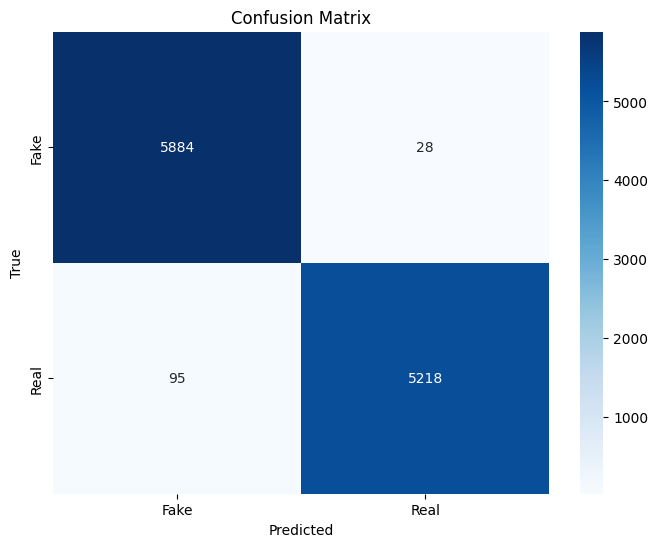

In [77]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [78]:
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))


              precision    recall  f1-score   support

        Fake       0.98      1.00      0.99      5912
        Real       0.99      0.98      0.99      5313

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

